In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [2]:
# UNQ_C1
# GRADED FUNCTION: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
          # Array to hold distance between X[i] and each centroids[j]
            distance = [] 
            for j in range(centroids.shape[0]):
                norm_ij = np.linalg.norm(X[i] - centroids[j]) # Your code to calculate the norm between (X[i] - centroids[j])
                distance.append(norm_ij)

            idx[i] = np.argmin(distance) # Your code here to calculate index of minimum value in distance
        
        
            
            
        
     ### END CODE HERE ###
    
    return idx

In [3]:
# Load an example dataset that we will be using
def load_data():
    X = np.load("ex7_X-Copy1.npy")
    return X

In [4]:
X = load_data()

In [5]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


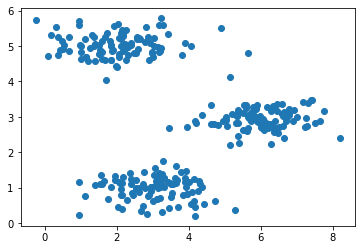

In [6]:
#plotting of Data using scatter plot

plt.scatter(X[:,0],X[:,1]) #first column is x co-ordinate and second column in y co-ordinate.

In [8]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]]) ##first column is x co-ordinate and second column in y co-ordinate.

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx)


First three elements in idx are: [0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 0]


In [18]:
#np.linalg.norm(X[1]-initial_centroids[2])

2.3499462509952416

In [8]:
idx.shape

(300,)

In [17]:
X[idx == 2]

array([[5.65858312, 4.79996405],
       [7.42892098, 3.4667949 ],
       [7.75660559, 3.15604465],
       [7.17135204, 3.4122727 ],
       [7.39807241, 3.48487031],
       [7.30278708, 3.38015979]])

In [9]:
# UNQ_C2
# GRADED FUNCTION: compute_centpods

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for k in range(K):   
        points = X[idx == k] # Your code here to get a list of all data points in X assigned to centroid k  
        centroids[k] = np.mean(points, axis = 0) # Your code here to compute the mean of the points assigned
        
        
    ### END CODE HERE ## 
    
    return centroids

In [10]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


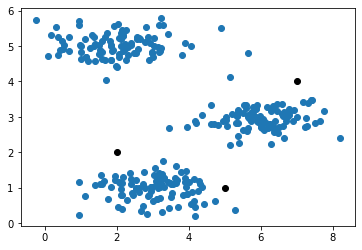

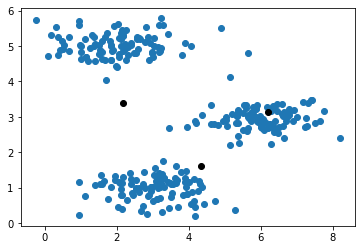

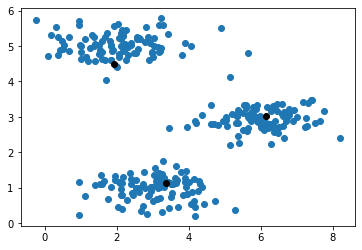

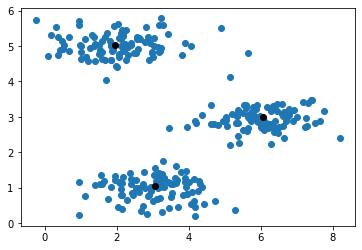

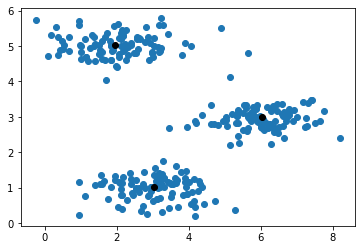

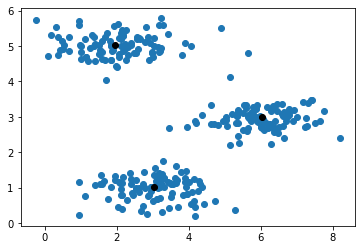

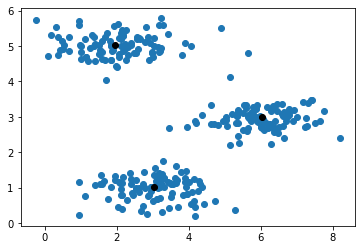

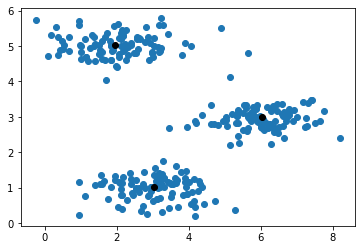

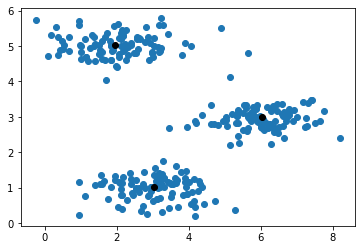

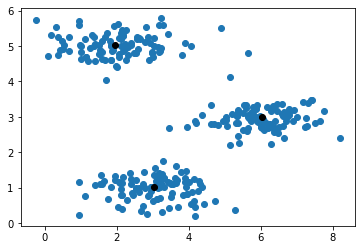

[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


In [11]:
m = 10 #max_ nterations
# Select an initial set of centroids (3 Centroids)

initial_centroids = np.array([[2,2], [5,1], [7,4]]) ##first column is x co-ordinate and second column in y co-ordinate.

K = 3 #number of centroids


for i in range(m):
    
    # Find closest centroids using initial_centroids
    
    idx = find_closest_centroids(X, initial_centroids)
    
   
    
   
    plt.scatter(X[:,0],X[:,1]) 
    plt.scatter(initial_centroids[:,0],initial_centroids[:,1],c='Black')
    
    initial_centroids = compute_centroids(X, idx, K)
    
    plt.show()

print(initial_centroids)
    
    
    